In [ ]:
using Pkg
cd("../")
Pkg.activate(".")
using Statistics
using LinearAlgebra
using Distributions
using Random
using PyPlot

# Example 1

In [2]:
x_max_plot = 3;

In [3]:
# parameters
α = 0.5; σ2 = 3/4;
# range for plotting
x = -x_max_plot:0.01:x_max_plot; y = -x_max_plot:0.01:x_max_plot;
# deterministic case
yhat_det = α .* x; xhat_det = (1/α) .* y;
# probabilitstic case
yhat_prob1 = α .* x; xhat_prob1 = (α / (α^2 + σ2) ) .* y;
# sampling function
function sample_ex1(N)
    X = randn(N); Y = (α .* X) .+ (sqrt(σ2) .* randn(N))
    return X, Y
end

sample_ex1 (generic function with 1 method)

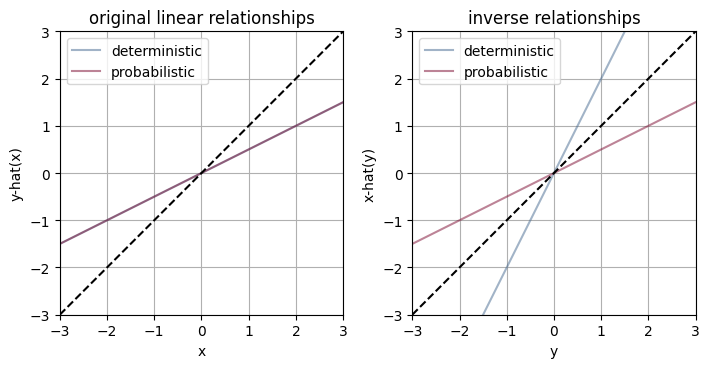

In [4]:
# Plotting
figure(figsize=(6,3) .* 1.2)
ax = subplot(1,2,1); ax.set_aspect("equal"); ax.grid()
ax.set_xlim([-x_max_plot,x_max_plot]); ax.set_ylim([-x_max_plot,x_max_plot]); 
ax.set_xticks(-x_max_plot:1:x_max_plot); ax.set_yticks(-x_max_plot:1:x_max_plot)
ax.set_xlabel("x"); ax.set_ylabel("y-hat(x)")
ax.plot(x,yhat_det,color = "#456990",alpha=0.5)
ax.plot(x,yhat_prob1,color = "#7B082E",alpha=0.5)
ax.legend(["deterministic","probabilistic"])
ax.plot(x,x,"--k")
ax.set_title("original linear relationships")


ax = subplot(1,2,2); ax.set_aspect("equal"); ax.grid() 
ax.set_xlim([-x_max_plot,x_max_plot]); ax.set_ylim([-x_max_plot,x_max_plot]); 
ax.set_xticks(-x_max_plot:1:x_max_plot); ax.set_yticks(-x_max_plot:1:x_max_plot)
ax.set_xlabel("y"); ax.set_ylabel("x-hat(y)")
ax.plot(y,xhat_det,color = "#456990",alpha=0.5)
ax.plot(y,xhat_prob1,color = "#7B082E",alpha=0.5)
ax.legend(["deterministic","probabilistic"])
ax.plot(y,y,"--k")
ax.set_title("inverse relationships")

tight_layout()
resolution_value = 600;
savefig("Ex1_lin.svg")

# Example 2

In [5]:
# variance function for the probabilistic case
σ_e(x) = sqrt(0.01 + 1 / (1 + 2*x^2))
# density functions for x and y|x
P_yx(y,x) = pdf(Normal(α * x, σ_e(x)),y)
P_x(x)    = pdf(Normal(0    , 1     ),x)

# marginal dist for y
dx_int = 0.001; x_bound_int = 50
X_int = (-x_bound_int):(dx_int):(x_bound_int)
P_y(y) = sum(P_yx.(y,X_int) .* P_x.(X_int) .* dx_int)

# conditional dist x
P_xy_nonorm(x,y) = P_yx(y,x) * P_x(x)
P_xy(x,y) = P_xy_nonorm(x,y) / P_y(y)

E_xy(y) = sum(P_xy_nonorm.(X_int,y) .* X_int .* dx_int) / P_y(y)

# probabilistic case
yhat_prob2 = α .* x; xhat_prob2 = E_xy.(y);

# sampling function
function sample_ex2(N)
    X = randn(N); Y = (α .* X) .+ (σ_e.(X) .* randn(N))
    return X, Y
end

sample_ex2 (generic function with 1 method)

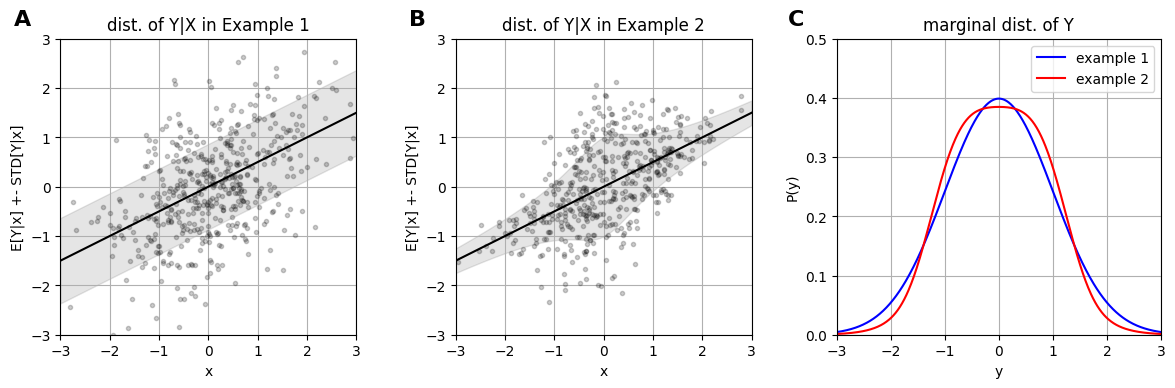

In [6]:
# Plotting Example 1 vs. Example 2
figure(figsize=(6,2).*2)

# Conditional dist
ax = subplot(1,3,1); ax.set_aspect("equal"); ax.grid()
ax.text(-0.1, 1.1, "A", transform=ax.transAxes, fontsize=16, fontweight="bold", va="top", ha="right")
ax.set_xlim([-x_max_plot,x_max_plot]); ax.set_ylim([-x_max_plot,x_max_plot]); 
ax.set_xticks(-x_max_plot:1:x_max_plot); ax.set_yticks(-x_max_plot:1:x_max_plot)
ax.set_xlabel("x"); ax.set_ylabel("E[Y|x] +- STD[Y|x]")
my = α .* x; dy = sqrt(σ2)
ax.plot(x,yhat_det,color = "k",alpha=1)
ax.fill_between(x,my .- dy, my .+ dy, color="k", alpha = 0.1)
X1,Y1 = sample_ex1(500); ax.plot(X1,Y1,".k",alpha = 0.2)
ax.set_title("dist. of Y|X in Example 1")

ax = subplot(1,3,2); ax.set_aspect("equal"); ax.grid()
ax.text(-0.1, 1.1, "B", transform=ax.transAxes, fontsize=16, fontweight="bold", va="top", ha="right")
ax.set_xlim([-x_max_plot,x_max_plot]); ax.set_ylim([-x_max_plot,x_max_plot]); 
ax.set_xticks(-x_max_plot:1:x_max_plot); ax.set_yticks(-x_max_plot:1:x_max_plot)
ax.set_xlabel("x"); ax.set_ylabel("E[Y|x] +- STD[Y|x]")
my = α .* x; dy = σ_e.(x)
ax.plot(x,yhat_det,color = "k",alpha=1)
ax.fill_between(x,my .- dy, my .+ dy, color="k", alpha = 0.1)
X2,Y2 = sample_ex2(500); ax.plot(X2,Y2,".k",alpha = 0.2)
ax.set_title("dist. of Y|X in Example 2")

# Marginal dist of Y
ax = subplot(1,3,3); ax.grid()
ax.text(-0.1, 1.1, "C", transform=ax.transAxes, fontsize=16, fontweight="bold", va="top", ha="right")
ax.set_xlim([-x_max_plot,x_max_plot]); ax.set_ylim([0.,0.5]); 
ax.set_xticks(-x_max_plot:1:x_max_plot);
ax.set_xlabel("y"); ax.set_ylabel("P(y)")
ax.plot(y,pdf.(Normal(0,sqrt(α^2 + σ2)),y),alpha=1,color="b")
ax.plot(y,P_y.(y),alpha=1,color="r")
ax.legend(["example 1","example 2"])
ax.set_title("marginal dist. of Y")

tight_layout()
savefig("Ex1_vs_Ex2.svg"); savefig("Ex1_vs_Ex2.png",dpi=resolution_value);

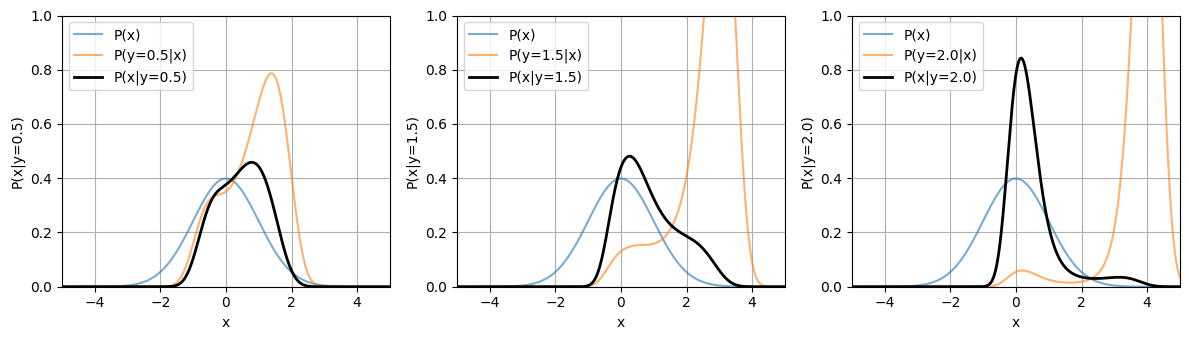

In [7]:
# Plotting posterior distribution of X|Y
figure(figsize=(12,3.5))
y_obs_set = [0.5,1.5,2]
for i = eachindex(y_obs_set)
    x_temp = -5:0.01:5
    y_obs = y_obs_set[i]
    ax = subplot(1,3,i); ax.grid()
    ax.set_xlim([-5,5]); ax.set_ylim([0,1]);
    ax.set_xlabel("x"); ax.set_ylabel("P(x|y=" * string(y_obs) * ")")
    ax.plot(x_temp,P_x.(x_temp),alpha=0.6)
    ax.plot(x_temp,P_yx.(y_obs,x_temp),alpha=0.6)
    ax.plot(x_temp,P_xy_nonorm.(x_temp,y_obs) ./ P_y(y_obs),"k",linewidth=2);
    ax.legend(["P(x)","P(y=" * string(y_obs) * "|x)","P(x|y=" * string(y_obs) * ")"])
end

tight_layout()
savefig("Ex2_post.svg"); savefig("Ex2_post.png",dpi=resolution_value);

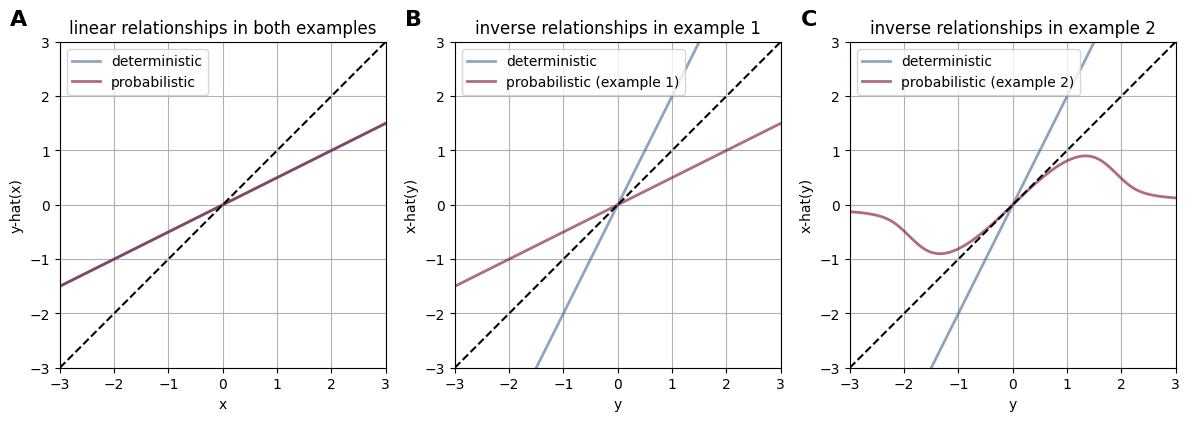

In [8]:
# Plotting
figure(figsize=(6,2.1) .* 2)
ax = subplot(1,3,1); ax.set_aspect("equal"); ax.grid()
ax.text(-0.1, 1.1, "A", transform=ax.transAxes, fontsize=16, fontweight="bold", va="top", ha="right")
ax.set_xlim([-x_max_plot,x_max_plot]); ax.set_ylim([-x_max_plot,x_max_plot]); 
ax.set_xticks(-x_max_plot:1:x_max_plot); ax.set_yticks(-x_max_plot:1:x_max_plot)
ax.set_xlabel("x"); ax.set_ylabel("y-hat(x)")
ax.plot(x,yhat_det,color = "#456990",alpha=0.6, linewidth=2)
ax.plot(x,yhat_prob2,color = "#7B082E",alpha=0.6, linewidth=2)
ax.legend(["deterministic","probabilistic"])
ax.plot(x,x,"--k")
ax.set_title("linear relationships in both examples")

ax = subplot(1,3,2); ax.set_aspect("equal"); ax.grid() 
ax.text(-0.1, 1.1, "B", transform=ax.transAxes, fontsize=16, fontweight="bold", va="top", ha="right")
ax.set_xlim([-x_max_plot,x_max_plot]); ax.set_ylim([-x_max_plot,x_max_plot]); 
ax.set_xticks(-x_max_plot:1:x_max_plot); ax.set_yticks(-x_max_plot:1:x_max_plot)
ax.set_xlabel("y"); ax.set_ylabel("x-hat(y)")
ax.plot(y,xhat_det,color = "#456990",alpha=0.6, linewidth=2)
ax.plot(y,xhat_prob1,color = "#7B082E",alpha=0.6, linewidth=2)
ax.legend(["deterministic","probabilistic (example 1)"])
ax.plot(y,y,"--k")
ax.set_title("inverse relationships in example 1")

ax = subplot(1,3,3); ax.set_aspect("equal"); ax.grid() 
ax.text(-0.1, 1.1, "C", transform=ax.transAxes, fontsize=16, fontweight="bold", va="top", ha="right")
ax.set_xlim([-x_max_plot,x_max_plot]); ax.set_ylim([-x_max_plot,x_max_plot]); 
ax.set_xticks(-x_max_plot:1:x_max_plot); ax.set_yticks(-x_max_plot:1:x_max_plot)
ax.set_xlabel("y"); ax.set_ylabel("x-hat(y)")
ax.plot(y,xhat_det,color = "#456990",alpha=0.6, linewidth=2)
ax.plot(y,xhat_prob2,color = "#7B082E",alpha=0.6, linewidth=2)
ax.legend(["deterministic","probabilistic (example 2)"])
ax.plot(y,y,"--k")
ax.set_title("inverse relationships in example 2")

tight_layout()
savefig("Relationships.svg"); savefig("Relationships.png",dpi=resolution_value);